In [3]:
%reload_ext autoreload
%autoreload 2

import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import matplotlib as mpl

from src.files import results_dir
from src.iaf.source_population import SourcePopulationGabor
from src.plotting import errorPlot
from src.iaf.analysis import (
    gather_metadata,
    gather_results,
    gather_rates,
    gather_weights,
    get_groupnames,
    sort_orientation_preference,
    summarize_weights,
)

In [9]:
experiment_folder = results_dir("iaf_runs") / "hofer" / "20250320"
metadata = gather_metadata(experiment_folder, experiment_type="hofer")
firing_rates = gather_rates(metadata, experiment_type="hofer")
weights = gather_weights(metadata, experiment_type="hofer", average_method="fraction", average_window=0.2, normalize=True)

In [12]:
results = gather_results(metadata)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/landauland/Documents/GitHub/plasticy-modeling/results/iaf_runs/hofer_explore/20250322/ratio_0_edge_0_repeat_0.joblib'

In [4]:
orientation_preference = {sg: np.argmax(weights[sg], axis=-1) % 4 for sg in get_groupnames()}
weights_preferred = sort_orientation_preference(weights, orientation_preference["proximal"])

In [5]:
summary = summarize_weights(weights, orientation_preference["proximal"])

In [6]:
location_order = ["central", "edge", "outer"]
orientation_order = ["preferred", "other"]
weight_group_order = [f"{loc}-{ori}" for ori in orientation_order for loc in location_order]

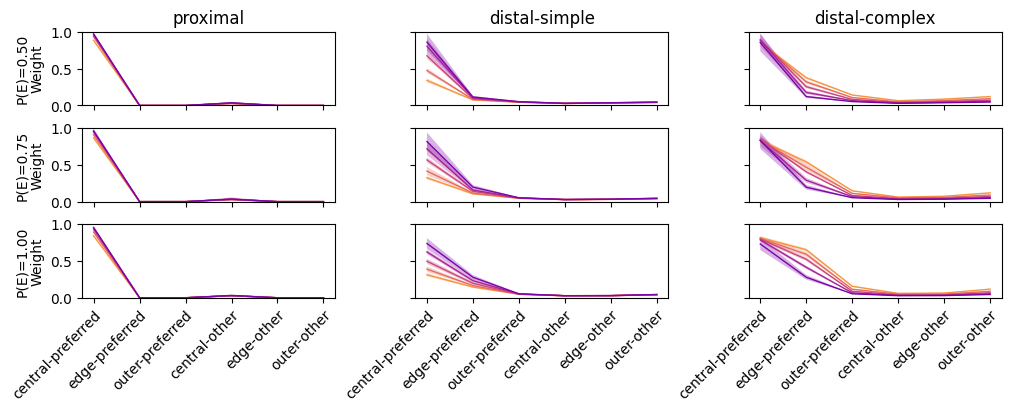

In [7]:
num_edges = len(metadata["edge_probabilities"])
num_ratios = len(metadata["dp_ratios"])
cmap = mpl.colormaps["plasma_r"]
colors = [cmap(ii) for ii in np.linspace(0, 1, num_ratios+4)[2:-2]]

fig, ax = plt.subplots(num_edges, 3, layout="constrained", figsize=(10, 4), sharex=True, sharey=True)
for iedge in range(num_edges):
    for igroup, sgname in enumerate(get_groupnames()):
        for iratio in range(num_ratios):
            data = np.stack([np.reshape(summary[wg][igroup, iratio, iedge], -1) for wg in weight_group_order])
            errorPlot(range(6), data, axis=1, ax=ax[iedge, igroup], color=colors[iratio], linewidth=1.0, alpha=0.3)
        ax[iedge, igroup].set_ylim(0, 1)

for igroup, sgname in enumerate(get_groupnames()):
    ax[0, igroup].set_title(sgname)
    ax[-1, igroup].set_xticks(range(len(weight_group_order)), labels=weight_group_order, rotation=45, ha="right", rotation_mode="anchor")
for iedge in range(num_edges):
    ax[iedge, 0].set_ylabel(f"P(E)={metadata['edge_probabilities'][iedge]:.2f}\nWeight")

plt.show()

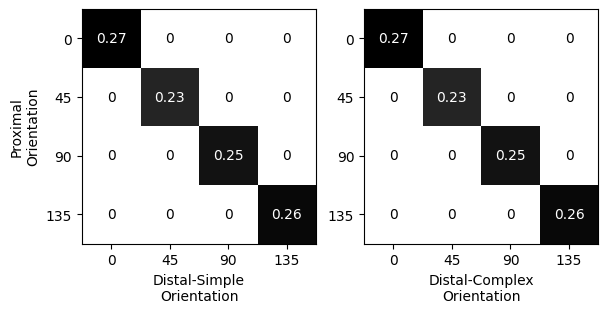

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(6, 3), layout="constrained")
ConfusionMatrixDisplay.from_predictions(orientation_preference["distal-simple"].reshape(-1), orientation_preference["proximal"].reshape(-1), ax=ax[0], cmap="gray_r", colorbar=False, normalize="all")
ConfusionMatrixDisplay.from_predictions(orientation_preference["distal-complex"].reshape(-1), orientation_preference["proximal"].reshape(-1), ax=ax[1], cmap="gray_r", colorbar=False, normalize="all")
ax[0].set_xlabel("Distal-Simple\nOrientation")
ax[1].set_xlabel("Distal-Complex\nOrientation")
ax[0].set_ylabel("Proximal\nOrientation")
ax[1].set_ylabel(None)
ticks = np.arange(4)
labels = np.array(ticks * 180 / 4, dtype=int)
ax[0].set_xticks(ticks, labels)
ax[1].set_xticks(ticks, labels)
ax[0].set_yticks(ticks, labels)
ax[1].set_yticks(ticks, labels)
plt.show()